### Задание

#### 1. Получите данные и загрузите их в рабочую среду. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.tree import plot_tree

In [2]:
# Загрузим датасет fetch_california_housing
data = fetch_california_housing()

In [3]:
X = data.data
y = data.target

# Составим датафрейм из необходимых данных
df = pd.DataFrame(X, columns=data.feature_names)

# Добавим столбец с целевой переменной
df['MedHouseValue'] = y

#### 2. Проведите первичный анализ.

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##### a. Проверьте данные на пропуски. Удалите в случае обнаружения.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##### b. Нормализуйте один из признаков.

In [7]:
scaler = StandardScaler()

In [8]:
df['AveOccup'] = scaler.fit_transform(df[['AveOccup']])

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.442552e-18,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,1.000024e+00,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,-2.290000e-01,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,-6.171062e-02,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,-2.431585e-02,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,2.037453e-02,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1.194191e+02,41.950000,-114.310000,5.000010


#### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],
                                                    df['MedHouseValue'],
                                                    test_size=0.2,
                                                    random_state=42)

#### 4. Обучите модель регрессии на обучающем множестве. 

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

#### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию `score`.

In [14]:
y_test_pred = model.predict(X_test)

In [15]:
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.5757877060324512


#### 6. Обучите дерево решений на обучающем множестве.

In [16]:
tree = DecisionTreeRegressor(random_state=42)

In [17]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

##### a. Повторите п. 5 для полученной модели.

In [18]:
y_test_pred = tree.predict(X_test)

In [19]:
score = tree.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.622075845135081


##### b. Визуализируйте часть дерева решений.

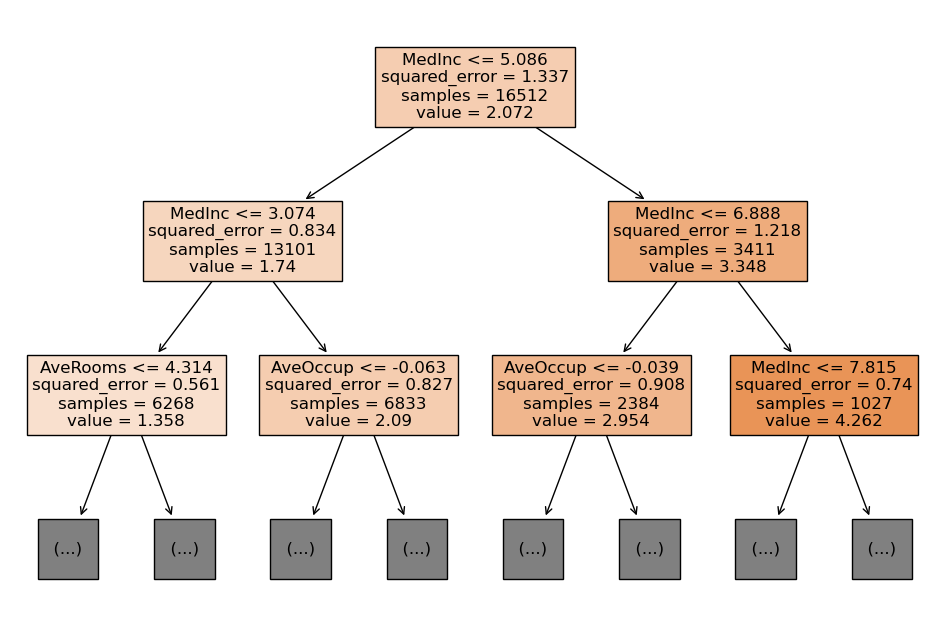

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(tree, max_depth=2, feature_names=data.feature_names, filled=True, fontsize=12)
plt.show()

In [21]:
# Визуализация части дерева решений в текстовом представлении
tree_text = export_text(tree, max_depth=2, feature_names=data.feature_names)
print(tree_text)

|--- MedInc <= 5.09
|   |--- MedInc <= 3.07
|   |   |--- AveRooms <= 4.31
|   |   |   |--- truncated branch of depth 29
|   |   |--- AveRooms >  4.31
|   |   |   |--- truncated branch of depth 28
|   |--- MedInc >  3.07
|   |   |--- AveOccup <= -0.06
|   |   |   |--- truncated branch of depth 28
|   |   |--- AveOccup >  -0.06
|   |   |   |--- truncated branch of depth 32
|--- MedInc >  5.09
|   |--- MedInc <= 6.89
|   |   |--- AveOccup <= -0.04
|   |   |   |--- truncated branch of depth 23
|   |   |--- AveOccup >  -0.04
|   |   |   |--- truncated branch of depth 26
|   |--- MedInc >  6.89
|   |   |--- MedInc <= 7.82
|   |   |   |--- truncated branch of depth 19
|   |   |--- MedInc >  7.82
|   |   |   |--- truncated branch of depth 22



#### 7. Оптимизируйте глубину дерева. Оптимизируйте ещё один параметр модели на выбор.

In [22]:
# Оптимизираем глубину дерева и минимальное число объектов в листе
tree_mod = DecisionTreeRegressor(random_state=42, max_depth=17, min_samples_leaf=21)

In [23]:
tree_mod.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, min_samples_leaf=21, random_state=42)

##### a. Повторите п. 5 для полученной модели.

In [24]:
y_test_pred = tree_mod.predict(X_test)

In [25]:
score = tree_mod.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.7281476385406436


#### 8. Сформулируйте выводы по проделанной работе.

Модель линейной регрессии показала точность предсказания, равную 0.58.  
Модель дерева решений без оптимизации параметров показала точность предсказания, равную 0.62.
Оптимизированная по двум параметрам модель дерева решений показала точность предсказания, равную 0.73.

Для разных задач и данных может быть предпочтительной различная модель.
Модель линейной регрессии подходит для задач, где связь между признаками и целевой переменной линейная. Модель дерева решений подходит для задач с нелинейными зависимостями и способна улавливать сложные взаимосвязи. Линейная регрессия проста и быстра, дерево решений может более точно адаптироваться к сложным зависимостям.  
Оптимизация параметров моделей может улучшить их производительность на конкретных данных.